In [3]:
%run ../../Emulator.ipynb
%run ../../Clusterer.ipynb

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
a = Emulator(
    region=[-30, 10, -45, 40],
    start_time="2017-07-01T00:00:00",
    end_time="2017-07-01T02:59:59"
)

myFeaturesNames = [
    "bparam",
    "acure_autoconv_exp_nd",
    "a_ent_1_rp",
    "acure_dry_dep_acc",
    "acure_dry_dep_ait",
    "acure_dry_dep_so2",
    "acure_bvoc_soa",
    "acure_dms",
    "acure_bl_nuc",
    "acure_ait_width",
    "acure_cloud_ph",
    "dbsdtbs_turb_0",
    "acure_bc_ri",
    "acure_sea_spray",
    "acure_carb_bb_diam" #, 'acure_anth_so2_r'
]

a1 = Emulator(
    region=[-30, 10, -45, 40],
    excludeFeats=list(set(a.get_input_names()) - set(myFeaturesNames)),
    start_time="2017-07-01T00:00:00",
    end_time="2017-07-01T02:59:59",
    centerTarget=False
)

In [6]:
job = a1.retrieve_emulator_pixelwise()

In [11]:
job.status()

c3.MapReduceStatus(
 started=datetime.datetime(2022, 10, 3, 18, 14, 6, tzinfo=datetime.timezone.utc),
 startedby='jcarzon@andrew.cmu.edu',
 completed=datetime.datetime(2022, 10, 3, 18, 26, 59, tzinfo=datetime.timezone.utc),
 status='completed')

In [12]:
b1 = Clusterer(a1, job)

In [31]:
b1.cluster_pixels(clusteringMethod="kmeans", k=15, handleSmallClusters=True)
b1.labels

array([4, 3, 4, ..., 0, 0, 0])

In [32]:
np.unique(b1.labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([607,  55,  18,  79, 258,  33,  64,  44,  22,  32,  34, 136,  58]))

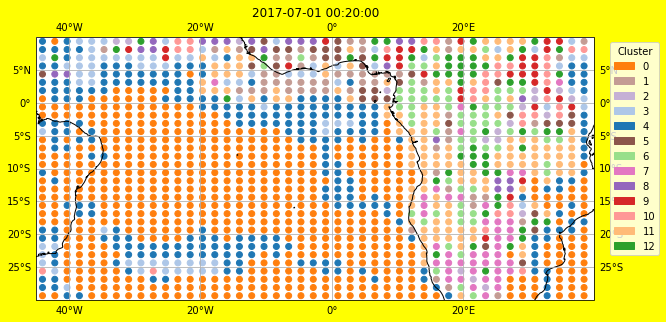

In [33]:
b1.plot_clusters(folder_title='uncentered_target_3_clusters', save=False)

In [34]:
cluster0 = b1.lengthscales[b1.labels==0]
notcluster0 = b1.lengthscales[b1.labels!=0]
cluster0

,acure_dry_dep_ait,acure_dry_dep_so2,acure_bvoc_soa,acure_ait_width,acure_carb_bb_diam,acure_cloud_ph,dbsdtbs_turb_0,acure_dry_dep_acc,acure_bc_ri,acure_bl_nuc,bparam,a_ent_1_rp,acure_sea_spray,acure_autoconv_exp_nd,acure_dms,modelId,latitude,longitude,time
8,20.852357,7954.219563,43220.550826,48169.289006,8.192015,30.550925,159.894758,12156.175681,9.311075,60.902998,42655.011143,23.643637,18.755922,244.394985,26.598521,99bafbba-1c17-402f-9a97-a4ad12fb0169,-0.625,-21.5625,2017-07-01 00:20:00
9,32.512492,16381.570565,66119.804586,23209.265485,7.747096,27.511402,14.913631,34772.271110,9.423180,64.117537,100000.000000,100000.000000,13.446061,31.251142,39.054431,9510bf43-4924-441b-8eb7-9011bb4fafa0,-0.625,-23.4375,2017-07-01 00:20:00
11,297.621913,17812.160482,18813.211027,20074.313976,15.322394,124.326549,113.164798,509.943932,43.755235,88.431527,224.858543,78.714166,93.929495,106.182865,36.184620,b1232cb7-34fd-43f7-8743-070ce5546d6c,-10.625,-10.3125,2017-07-01 00:20:00
12,116.408423,100000.000000,17714.234803,100000.000000,14.986173,119.955104,114.223249,360.878802,50.692406,106.135028,66026.635649,93.460778,69.218262,59.507879,100000.000000,de3ecb14-b537-4569-b39a-5b4ee9d93971,-10.625,-12.1875,2017-07-01 00:20:00
13,86.503277,62.768825,33972.289584,100000.000000,13.353113,248.273560,81.037792,248.886105,59.894799,114.736065,209.493750,106.155825,100000.000000,202.238250,100000.000000,a267847b-94e4-4c55-a9fb-918258d43fe5,-10.625,-14.0625,2017-07-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,10428.554348,3030.680483,6822.500336,81.709270,16.299984,27.220633,125.830950,25.591648,13.954555,28.971521,58.804666,167.206595,5468.114510,44.792354,22.942069,925e6aa9-840b-4bbc-bc97-4798187db8a8,-6.875,10.3125,2017-07-01 00:20:00
1426,33.483409,83045.752648,73856.864956,70048.873417,9.623976,45.747574,112.765225,57.614426,18.944493,69.248498,35.604319,130.264700,51.290315,36.047621,21.940687,4c59b4f0-a2f1-402c-bb56-622ed14ce45f,-6.875,2.8125,2017-07-01 00:20:00
1437,41.384148,26456.846184,89461.723509,74576.602729,8.552541,15.860035,85.972429,46.237186,19.544204,30.802649,126.047143,71.843708,74.256551,198.550060,41.737889,c19f1bc4-8a30-4599-8412-6db55fe4f9d0,-6.875,4.6875,2017-07-01 00:20:00
1438,67.884896,55.553439,100000.000000,100000.000000,8.186038,17.979046,77.201889,39.058469,16.385980,25.656094,77.719351,38073.242088,57.985075,56173.499815,45.229146,64605421-8683-41ae-944c-5511f4738315,-6.875,6.5625,2017-07-01 00:20:00


(array([515.,   4.,   4.,   2.,   2.,   1.,   3.,   1.,   2.,   0.,   5.,
          1.,   4.,   0.,   1.,   2.,   1.,   1.,   0.,   0.,   2.,   1.,
          1.,   0.,   1.,   1.,   1.,   0.,   2.,   1.,   0.,   1.,   0.,
          0.,   0.,   1.,   2.,   0.,   0.,   1.,   0.,   1.,   0.,   2.,
          2.,   0.,   1.,   0.,   0.,  37.]),
 array([6.18607775e+00, 2.00606236e+03, 4.00593863e+03, 6.00581491e+03,
        8.00569119e+03, 1.00055675e+04, 1.20054437e+04, 1.40053200e+04,
        1.60051963e+04, 1.80050726e+04, 2.00049489e+04, 2.20048251e+04,
        2.40047014e+04, 2.60045777e+04, 2.80044540e+04, 3.00043303e+04,
        3.20042065e+04, 3.40040828e+04, 3.60039591e+04, 3.80038354e+04,
        4.00037116e+04, 4.20035879e+04, 4.40034642e+04, 4.60033405e+04,
        4.80032168e+04, 5.00030930e+04, 5.20029693e+04, 5.40028456e+04,
        5.60027219e+04, 5.80025982e+04, 6.00024744e+04, 6.20023507e+04,
        6.40022270e+04, 6.60021033e+04, 6.80019795e+04, 7.00018558e+04,
        7.

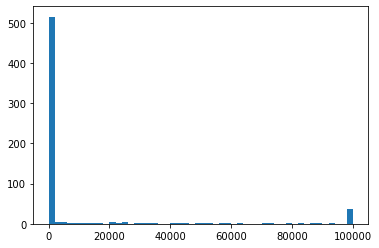

In [35]:
plt.hist(cluster0['acure_sea_spray'], bins=50)

In [36]:
print(1 / np.mean([1/x for x in cluster0['acure_sea_spray']]))
print(np.median(cluster0['acure_sea_spray']))
print(np.median(notcluster0['acure_sea_spray']))

40.83785858933609
51.762662645460836
18.713899097797245


In [25]:
cluster0[myFeaturesNames].median()

bparam                     138.594559
acure_autoconv_exp_nd       85.376075
a_ent_1_rp                 159.320344
acure_dry_dep_acc          103.852569
acure_dry_dep_ait          143.771762
acure_dry_dep_so2        11296.188031
acure_bvoc_soa           26875.589258
acure_dms                   44.994543
acure_bl_nuc                68.743299
acure_ait_width          15915.713102
acure_cloud_ph              63.889836
dbsdtbs_turb_0              67.132475
acure_bc_ri                 23.218412
acure_sea_spray             41.375710
acure_carb_bb_diam           8.205722
dtype: float64

In [37]:
b1.parameter_importance()

Center of cluster 0
                     name       value
0      acure_carb_bb_diam    9.266275
1             acure_bc_ri   28.762299
2         acure_sea_spray   41.555273
3               acure_dms   53.621640
4   acure_autoconv_exp_nd   62.490865
5          dbsdtbs_turb_0   65.634493
6          acure_cloud_ph   68.734663
7            acure_bl_nuc   72.182404
8              a_ent_1_rp   73.311592
9       acure_dry_dep_ait   85.997911
10      acure_dry_dep_acc   94.129196
11                 bparam  108.059420
12      acure_dry_dep_so2  174.520566
13        acure_ait_width  185.884031
14         acure_bvoc_soa  289.991593


Center of cluster 1
                     name      value
0             acure_bc_ri   2.570463
1          acure_cloud_ph   4.420612
2            acure_bl_nuc   4.428103
3               acure_dms   4.600171
4       acure_dry_dep_acc   5.150323
5       acure_dry_dep_ait   7.161317
6      acure_carb_bb_diam  10.790700
7              a_ent_1_rp  11.283888
8         acure_s

[                     name       value
 0      acure_carb_bb_diam    9.266275
 1             acure_bc_ri   28.762299
 2         acure_sea_spray   41.555273
 3               acure_dms   53.621640
 4   acure_autoconv_exp_nd   62.490865
 5          dbsdtbs_turb_0   65.634493
 6          acure_cloud_ph   68.734663
 7            acure_bl_nuc   72.182404
 8              a_ent_1_rp   73.311592
 9       acure_dry_dep_ait   85.997911
 10      acure_dry_dep_acc   94.129196
 11                 bparam  108.059420
 12      acure_dry_dep_so2  174.520566
 13        acure_ait_width  185.884031
 14         acure_bvoc_soa  289.991593,
                      name      value
 0             acure_bc_ri   2.570463
 1          acure_cloud_ph   4.420612
 2            acure_bl_nuc   4.428103
 3               acure_dms   4.600171
 4       acure_dry_dep_acc   5.150323
 5       acure_dry_dep_ait   7.161317
 6      acure_carb_bb_diam  10.790700
 7              a_ent_1_rp  11.283888
 8         acure_sea_spray  11.51